In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
sns.set()

In [4]:
data = pd.read_excel('week2_challenge_data_source.xlsx')
#data.info()

In [5]:
telcomdata=data.copy()
test = data.copy()
teldat = data.copy()

In [652]:
telcomdata['Netflix'] = telcomdata['Netflix DL (Bytes)'] + telcomdata['Netflix UL (Bytes)']
telcomdata['YouTube'] = telcomdata['Youtube DL (Bytes)'] + telcomdata['Youtube UL (Bytes)']
telcomdata['Gaming'] = telcomdata['Gaming DL (Bytes)'] + telcomdata['Gaming UL (Bytes)']
telcomdata['Other'] = telcomdata['Other DL (Bytes)'] + telcomdata['Other UL (Bytes)']
telcomdata['Social Media'] = telcomdata['Social Media DL (Bytes)'] + telcomdata['Social Media UL (Bytes)']
telcomdata['Google'] = telcomdata['Google DL (Bytes)'] + telcomdata['Google UL (Bytes)']
telcomdata['Email'] = telcomdata['Email DL (Bytes)'] + telcomdata['Email DL (Bytes)']
telcomdata['total'] = telcomdata['Total DL (Bytes)'] + telcomdata['Total UL (Bytes)']

In [698]:
#telcomdata.info()

## make a separate table of only the data totals to work with

In [699]:
totals = telcomdata.iloc[:, 55:]
totals.insert(0, 'MISI',telcomdata['IMSI'])
#totals.head()


The resutlts shows a poor correlation of data comsumption among the various applications

## Total data consumption per application

In [670]:
dff = totals.copy()
df= dff.sort_values(["total"], ascending = False)

In [671]:
dat = df.head(10)
dat.rename(columns = {'MISI' : 'Customer_id'},inplace = True)

C:\Users\Programms\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [672]:
valu = []
dlabels = ['Netflix', 'YouTube','Gaming','Other','Social Media','Google']
for i in dlabels:
    su = float('{0:.2f}'.format(dff[i].sum(axis = 0)*(1*10**-9)))
    valu.append(su)
valu

[3394.31, 3396.55, 64550.4, 64405.23, 274.24, 1171.1]

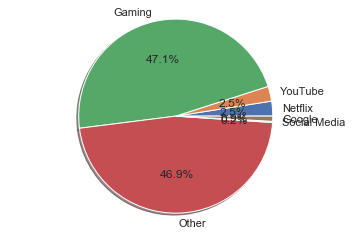

In [505]:
fig1, ax1 = plt.subplots()
ax1.pie(valu, labels=dlabels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

No handles with labels found to put in legend.


Text(0.5, 0, 'Application')

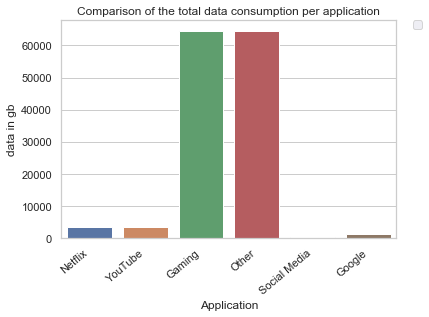

In [673]:
with sns.axes_style("whitegrid"):
    chart = sns.barplot(x=dlabels, y=valu)
    chart.set_xticklabels(rotation=40, ha="right", labels= dlabels)
plt.title("Comparison of the total data consumption per application")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
plt.ylabel('data in gb')
plt.xlabel('Application')


## Top 10 handsets

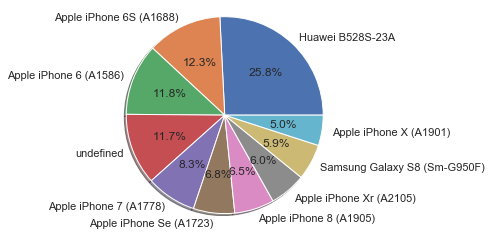

In [640]:
#Top 10 handsets
top10handsets = test['Handset Type'].value_counts(dropna=True).sort_values(ascending = False).head(10)

top10handsets
sizes = []
for i in top10handsets:
    sizes.append(i)
    
    

#plt.pie([int(v) for v in top10handsets.values()], labels=[string(k) for k in top10handsets.keys()],
          # autopct=None)

labels = ['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'undefined','Apple iPhone 7 (A1778)','Apple iPhone Se (A1723)',
'Apple iPhone 8 (A1905)','Apple iPhone Xr (A2105)','Samsung Galaxy S8 (Sm-G950F)','Apple iPhone X (A1901)']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

## top3 manufacturers

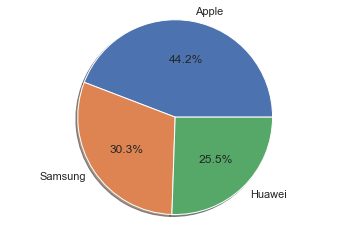

In [641]:

top3handset_mnf = test['Handset Manufacturer'].value_counts(dropna=False).sort_values(ascending = False).head(3)
val = []
top3handset_mnf
for j in top3handset_mnf:
    val.append(j)
labels = ['Apple','Samsung','Huawei']


fig1, ax1 = plt.subplots()
ax1.pie(val, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [632]:
#top3handset_mnf

To get the top 5 Handset types for each of the top 3 Manufacturers, you will first need to know the count of each handset type. You will then group them by manufacturer type and then get the top 5 from each group.

In [674]:
# Add another column for frequency to the data frame
test['frequency'] = test['Handset Type'].map(test['Handset Type'].value_counts())

#group by manufacturer
df1 = test.groupby(["Handset Manufacturer"])
#sort by frequency which represents the count of each handset 
df2= df1.apply(lambda x: x.sort_values(["frequency"], ascending = False))
df3=df2.reset_index(drop=True)

df4 = df3.groupby('Handset Manufacturer').head(5) 

dfA = df4[df4['Handset Manufacturer'] == 'Apple']
dfA5 = dfA[['Handset Manufacturer', 'Handset Type']]

dfH = df4[df4['Handset Manufacturer'] == 'Huawei']
dfH5 = dfH[['Handset Manufacturer', 'Handset Type']]


dfS = df4[df4['Handset Manufacturer'] == 'Samsung']
dfS5 = dfS[['Handset Manufacturer', 'Handset Type']]



In [678]:
#Top 5 Handsets by Apple
dfA5


,Handset Manufacturer,Handset Type
47,Apple,Apple iPhone 6S (A1688)
48,Apple,Apple iPhone 6S (A1688)
49,Apple,Apple iPhone 6S (A1688)
50,Apple,Apple iPhone 6S (A1688)
51,Apple,Apple iPhone 6S (A1688)


In [679]:
#Top 5 by Huawei
dfH5

,Handset Manufacturer,Handset Type
60692,Huawei,Huawei B528S-23A
60693,Huawei,Huawei B528S-23A
60694,Huawei,Huawei B528S-23A
60695,Huawei,Huawei B528S-23A
60696,Huawei,Huawei B528S-23A


In [680]:
#Top 5 by Samsung
dfS5

,Handset Manufacturer,Handset Type
96516,Samsung,Samsung Galaxy S8 (Sm-G950F)
96517,Samsung,Samsung Galaxy S8 (Sm-G950F)
96518,Samsung,Samsung Galaxy S8 (Sm-G950F)
96519,Samsung,Samsung Galaxy S8 (Sm-G950F)
96520,Samsung,Samsung Galaxy S8 (Sm-G950F)


In [33]:
#telcomdata.sort_values(['Handset Type', 'value'], axis=0).groupby('Handset Manufacturer').head(2)

In [675]:
workwith = data.copy()

In [676]:
#total data, both download and upload
workwith['total_dat'] = workwith.loc[:,['Total DL (Bytes)','Total UL (Bytes)']].sum(axis=1)
workwith['total_dat'].sum()*(1*10**-9)

74364.695455661

In [647]:
#workwith.info()

In [677]:
nums = workwith.iloc[:, 39:-1]

## sums of the data fields

In [649]:

nums.sum(axis =0)


Social Media DL (Bytes)    2.693001e+11
Social Media UL (Bytes)    4.939298e+09
Google DL (Bytes)          8.626186e+11
Google UL (Bytes)          3.084833e+11
Email DL (Bytes)           2.687611e+11
Email UL (Bytes)           7.010648e+10
Youtube DL (Bytes)         1.745123e+12
Youtube UL (Bytes)         1.651423e+12
Netflix DL (Bytes)         1.744039e+12
Netflix UL (Bytes)         1.650274e+12
Gaming DL (Bytes)          6.330713e+13
Gaming UL (Bytes)          1.243268e+12
Other DL (Bytes)           6.316550e+13
Other UL (Bytes)           1.239728e+12
Total UL (Bytes)           6.168181e+12
Total DL (Bytes)           6.819651e+13
dtype: float64

In [681]:
#nums.describe()

## xDR total duration for each customer in minutes

In [650]:
durms = test.groupby(['IMSI'])['Dur. (ms)'].sum()
durmin =  (durms / (1000*60)) % 60
durmin

IMSI
2.040471e+14    14.497400
2.040808e+14    14.623083
2.082001e+14     1.433650
2.082001e+14     1.437567
2.082001e+14     9.565383
                  ...    
2.082099e+14     2.122783
2.082099e+14     2.809050
2.082099e+14     1.439983
2.082522e+14     0.943550
2.140743e+14     3.779833
Name: Dur. (ms), Length: 107265, dtype: float64

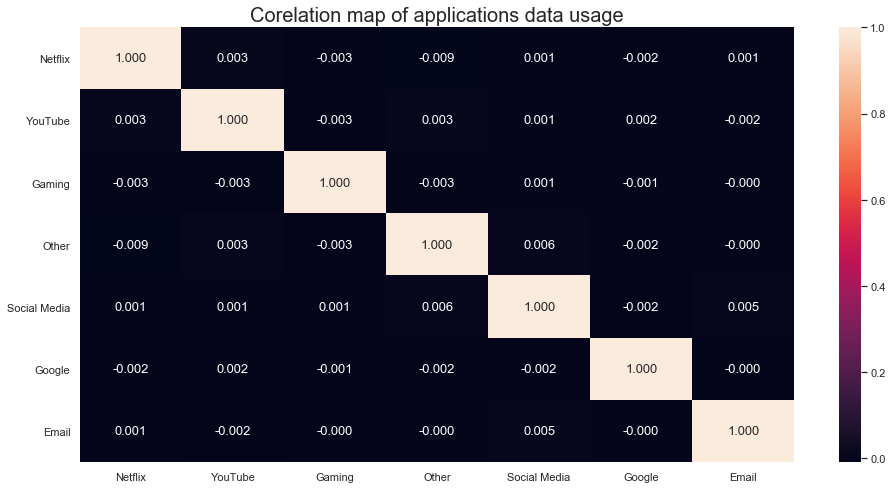

In [682]:
cordata =  telcomdata.iloc[:, 55:-1]
cor = cordata.corr(method ='pearson')

plt.figure(figsize=(16,8))
ax = sns.heatmap(cor,
                annot=True,
                fmt=".3f",
                annot_kws={'size':13},
                )

plt.title("Corelation map of applications data usage", fontsize=20)
plt.show()

## Deciles and computing the DL + UL for the top 5 decile class

In [683]:
telcomdata['Decile_rank'] = pd.qcut(telcomdata['Dur. (ms)'], 10,duplicates = 'drop'
                            ,labels = False)
dciles = telcomdata.groupby('Decile_rank')
datasum = dciles['total'].sum()
top5 = datasum[:4]
top5

Decile_rank
0.0    7.438374e+12
1.0    7.445197e+12
2.0    7.478623e+12
3.0    1.614182e+13
4.0    6.087404e+12
Name: total, dtype: float64

## Dimensionality reduction

In [6]:
labelencoder = LabelEncoder()
led = LabelEncoder()

In [7]:
#encoding categorical features
col = teldat['Handset Type']
teldat =teldat.apply(lambda col: labelencoder.fit_transform(col.astype(str)), axis=0, result_type='expand')


In [8]:
#encoding manufacturer type
col1 = teldat['Handset Manufacturer']
teldat = teldat.apply(lambda col: led.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [9]:
features = teldat.columns
x = teldat.loc[:, features].values
x = StandardScaler().fit_transform(x) 


In [10]:
np.mean(x),np.std(x)

(2.1237765470785723e-17, 0.9999999999999999)

In [11]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_dat = pd.DataFrame(x,columns=feat_cols)
normalised_dat.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54
149996,1.642408,-1.326507,-0.599509,1.412929,-1.617073,0.863167,-1.611511,-0.930565,-0.837737,1.392448,...,0.297444,-0.908722,0.608060,1.036680,1.320253,-0.667466,0.319033,0.054173,-0.743551,1.435574
149997,-0.733338,-1.326507,-0.464379,1.695306,1.664463,1.282256,1.423751,0.033919,-0.179383,-1.024714,...,-0.129445,-0.789628,0.879920,1.349748,-1.629369,1.653513,-1.188847,1.042989,0.820733,-1.562361
149998,0.645363,-1.326444,-1.316740,1.700171,0.937937,1.288952,0.219288,-1.474691,0.070534,0.302324,...,1.487338,0.822824,-0.463741,-1.414305,1.459340,0.028048,0.252171,-0.879460,0.307779,1.530683
149999,0.645363,-1.326444,0.443421,1.694134,-1.133880,1.281140,-1.681060,1.497071,1.083247,-0.213207,...,-0.672797,-0.786616,-1.679128,-0.231416,0.441173,1.078930,-0.672770,0.205195,-0.221460,0.433653
150000,-1.733218,-1.326412,-1.718666,-1.721878,-1.724835,1.332294,-1.480548,-1.477769,-1.497360,1.277265,...,-1.278457,1.116421,-1.306378,1.096119,0.787922,-0.900278,0.795500,-0.915382,-0.453935,-0.449233


In [694]:
pca_dat = PCA(n_components=2)
principalComponents_breast = pca_dat.fit_transform(x)

In [695]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [696]:
principal_Df.tail()

,principal component 1,principal component 2
149996,-1.811453,-0.377833
149997,-2.227066,0.633636
149998,-1.987368,0.284054
149999,-1.441946,0.314132
150000,2.802851,16.833673


In [697]:
print('Explained variation per principal component: {}'.format(pca_dat.explained_variance_ratio_))

Explained variation per principal component: [0.1318621  0.04051098]


<ul>
<li>The initial data with 55 features have been reduced to only 2 features/li>
<li>Principal component 1 contains 12% of the features while principal component 2 contains 3% of the features</li>
<li>In all, only 15% of the features are retained and 85% lost</li>
<li>This is not a good fit of the data.</li>
</ul>